# Chapter 3: Classification
Notes for *Hands on Machine Learning with Scikit by Aurelien Geron*. This is on Chapter 3: Classification, where it explains the fundamentals on how Machine Learning identify one group from the other using statistics.

# Getting Started
The dataset used is the *MNIST*, which is a collection of handwritten numbers in the format of image pixels. The goal is to have the machine tell us what number is in each image.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

You can download a copy of the dataset from sklearn. This gets updated often, which is why it is different on the book.

In [2]:
df, target = mnist["data"], mnist["target"]

We separate the data from the labels. I usually use *df* for the main data and *target* as the labels. *df* are the image pixels of handwritten numbers that we use to predict the *target*, which tells us which number it is.

In [3]:
print('dataframe', df.shape)
print('target', target.shape)

dataframe (70000, 784)
target (70000,)


In [4]:
df.iloc[0].describe()

count    784.000000
mean      35.108418
std       79.699674
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 0, dtype: float64

There are 70,000 numbers in the dataset and each number holds 784 pixels. Each pixel has a value between 0 to 255, which indicates the intensity of the black color. 

## Split Train Test
We split the data between *Train* and *Test*. We use the *Train* for majority of our exploration and data engineering. The *Test* is only used at the very end, where we validate our results.

In [5]:
train_df, test_df, train_target, test_target = df[:60000], df[60000:], target[:60000], target[60000:]

The MINST dataset is already dividied into Train and Test. The first 60k rows is the Train and the rest are the Test.

In [6]:
import numpy as np
shuffle_index = np.random.permutation(60000)
train_df, train_target = train_df.iloc[shuffle_index], train_target.iloc[shuffle_index]

There is a chance that the numbers are in order in a way that it will affect our models (Like a new deck of cards, we would always shuffle it before using them). Here, we shuffle it using the index.

# Explore Data
Our data is prepapred. It is time to Explore, Clean and Machine Learning the shit out of it. This section is where we keep all our Exploring data.

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
seven = train_df.loc[59963].values

I use the index 59963 to get a number 7 that we can use as an example.

7


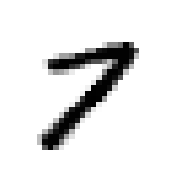

In [32]:
seven_target = train_target.loc[59963] # Keep your first digit in roll cause it will keep changing.
print(roll)
plt.figure(figsize=(2,2))
number_seven_image = seven.reshape(28, 28)
plt.imshow(number_seven_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

We render the number on our dataset to see what it looks like. True enough it is a seven.

# Clean Data
In this section, we Clean the data.

In [33]:
import numpy as np
train_target = train_target.astype(np.uint8)
test_target = test_target.astype(np.uint8)

The values of each targets are strings. We want them as intigers.

# Machine Learning
In this section, we do our Machine Learning algorithms. We start with an easy algorithm, then we work our way up to the more complex ones.

## Stochastic Gradient Descent
We start by identifying our *roll* number. We use SGD for this task, which apparently deals with training instances independently.

In [37]:
train_target_seven = (train_target == int(seven_target))
# test_roll = (test_target==roll)

Instead of finding out what number it is, we just check if that number is our *roll* number - TRUE or FALSE.

In [38]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_df, train_target_seven)
sgd_clf.predict([seven])

array([ True])

The model correctly predicts that image details is the number seven. Let's see how accurate this model is in predicting the whole training set.

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_df, train_target_seven, cv=3, scoring="accuracy")

array([0.97255, 0.98015, 0.97785])

*cross_val_score* splits the training data into 3 folds and uses 2 folds as training data and 1 fold as the test. It does this 3 times in different combination. The result shows that on average, the model is accurate around ~95% of the time. Accuracy is unusually high. We try it out on dumber model and see what the results are.

In [40]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [41]:
never_roll_clf = Never5Classifier()
cross_val_score(never_roll_clf, train_df, train_target_seven, cv=3, scoring="accuracy")

array([0.89405, 0.8952 , 0.8975 ])

Again, we get very high results. This is because ~90% of the numbers are not sevens. So, if the model says that all numbers are not sevens (All FALSE), then the accuracy would be around ~90%. This is why accuracy, as a measure of classification, sucks.

## Confusion Matrix
Instead just counting the correct predictions, Confusion Matrix also takes into account the wrong predictions. This creates balance in the way we evaluate our models.

In [45]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_df, train_target_seven, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target_seven, y_train_pred)

array([[53154,   581],
       [  808,  5457]], dtype=int64)

![confusion_matrix](image1.jpg)

Precision is the number of times you predicted that the number was seven versus all the predictions where you thought it is a seven. Recall is the number of times you predicted that the number was seven versus all the actual sevens that exists in the dataset.

Precision alone is not enough to evaluate a model. If say you had only 1 True prediction, which happens to be a seven, then your precision is 100%. Recall is also not useful by itself. It is possible to get a 100% recall if the model predicted that ALL numbers are sevens, which gives you a Recall of 100%.

Both Precision and Recall helps creates a balance in the way we evaluate our models.

In [48]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(train_target_seven, y_train_pred)
precision

0.9037760847962901

![confusion_matrix](confusionMatrix.svg)

Here, 90.38% of all the predictions our model made are actual sevens.

In [51]:
recall = recall_score(train_target_seven, y_train_pred)
recall

0.8710295291300878

But our recall is saying that we nare only detecting 87% of all the True sevens in our dataset.

## F1 score
Harmonic mean gives more weigh to low values. Regular mean will weight the 2 values equal.

In [ ]:
from sklearn.metrics import f1_score
print('mean: ', (precision + recall) / 2)
print('f1: ', f1_score(train_roll, y_train_pred))

### Threshold

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred